Main notebook containing relevant diagnostics and important figures for the manuscript. 

It is automatically copied from \_\_main\_\_.ipynb and executed for newly trained ensembles using papermill.

This can also be updated and then triggered again by using the script `execute_ensemble_notebook.py'.

In [1]:
from pathlib import Path
import torch
from torch import nn
from torch.nn import functional as nnf
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import dvs
from flyvision import plots

import logging

logging.disable()

mpl.rcParams["figure.dpi"] = 300

%load_ext autoreload
%autoreload 2

In [2]:
ensemble_name = "flow/9999"  # type: str

In [5]:
validation_subwrap = "original_validation_v2"
validation_loss_fn = "epe"

movingedge_subwrap = f"{validation_subwrap}/{validation_loss_fn}_based/moving_edges"
flash_subwrap = f"{validation_subwrap}/{validation_loss_fn}_based/flashes"
impulse_responses_subwrap = (
    f"{validation_subwrap}/{validation_loss_fn}_based/impulse_responses"
)
central_impulses_subwrap = f"{validation_subwrap}/{validation_loss_fn}_based/central_impulses_responses"
naturalistic_responses_wrap = "naturalistic_responses_v4"
naturalistic_responses_wrap = (
    f"{validation_subwrap}/{validation_loss_fn}_based/{naturalistic_responses_wrap}"
)
nmeis_subwrap = f"{naturalistic_responses_wrap}/nmeis"
rnmeis_subwrap = f"{naturalistic_responses_wrap}/rnmeis"

In [3]:
ensemble = dvs.analysis.EnsembleViews(ensemble_name)

  0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
ensemble[0].tnn.spec.comment

'review shuffle - no filter or synapse counts'

# Summary

## Purpose of the experiment:

...

## Observations:
...

## Conclusion:
...

# Diagnostics

## Config diff to main results

In [ ]:
nnv = dvs.analysis.NetworkViews("flow/0092/000")
print(
    f"Diff is:\n{nnv.tnn.spec.diff(ensemble[0].tnn.spec, name1=nnv.name, name2=ensemble[0].name)}"
)

## Extended data figures

In [ ]:
from dvs.analysis.extended_data_figures import (
    task_error,
    task_error_tuning_correlation,
    tuning_correlations_dsi,
    tuning_correlations_fri,
    preferred_direction_prediction_distances
)

In [ ]:
fig, ax = task_error(ensemble, validation_subwrap, validation_loss_fn)

In [ ]:
fig, ax = task_error_tuning_correlation(ensemble,
                                       validation_subwrap,
                                        validation_loss_fn,
                                        movingedge_subwrap,
                                        flash_subwrap,)

In [ ]:
fig, ax = tuning_correlations_dsi(ensemble, movingedge_subwrap)

In [ ]:
fig, ax = preferred_direction_prediction_distances(ensemble, movingedge_subwrap)

In [ ]:
fig, ax = tuning_correlations_fri(ensemble, flash_subwrap)

## Training and validation losses

In [ ]:
fig, ax = ensemble.training_loss(normalize=False)

In [ ]:
fig, ax = ensemble.validation_loss(
    normalize=False, validation_subwrap=validation_subwrap
)

## Learned parameter marginals

/groups/turaga/home/lappalainenj/FlyVis/dvs-sim/dvs/plots/decoration.py:183: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(new)


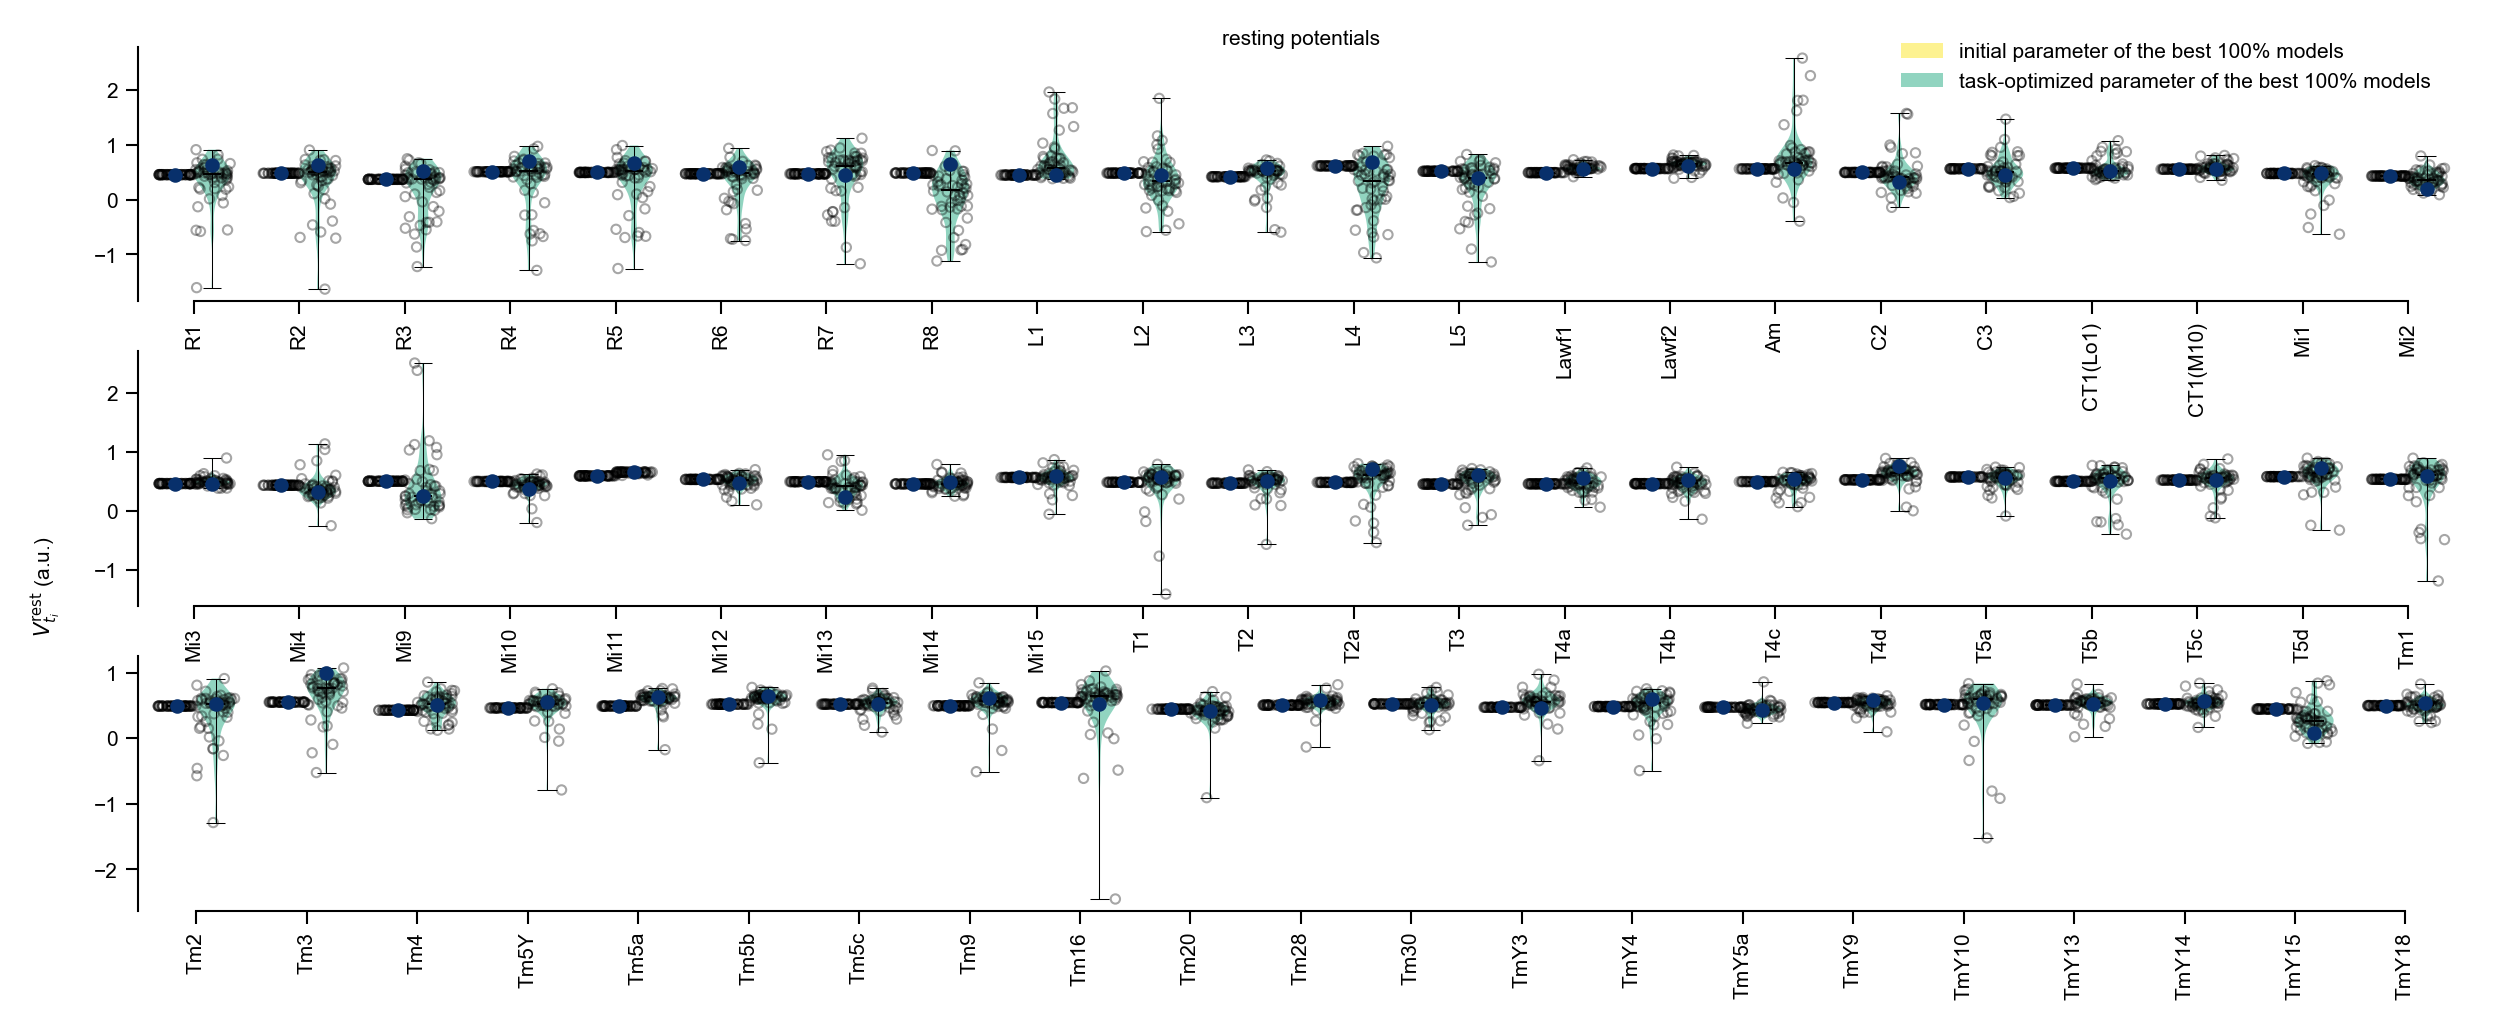

In [7]:
fig, axes, biases = ensemble.plot_parameter_marginals("nodes_bias")

In [ ]:
fig, axes, time_const = ensemble.plot_parameter_marginals("nodes_time_const")

In [ ]:
fig, axes, biases = ensemble.plot_parameter_marginals(
    "edges_syn_strength", max_per_ax=120
)

## Dead or alive


In [ ]:
ensemble.dead_or_alive(naturalistic_responses_wrap)

# Manuscript

## Figure 2

### A task error

In [ ]:
fig, ax = ensemble.loss_histogramm(
    normalize=False, other_ensemble="flow/0092", validation_subwrap=validation_subwrap
)

### B contrast selectivity

#### 100% models

In [ ]:
fig, ax = ensemble.fris_paper_figure(
    subwrap=flash_subwrap, validation_validation_subwrap=validation_subwrap
)

#### 20% best models

In [ ]:
with ensemble.model_ratio(best=0.2):
    fig, ax = ensemble.fris_paper_figure(
        subwrap=flash_subwrap, validation_validation_subwrap=validation_subwrap
    )

#### 50% best vs 50% worst models

In [ ]:
fig, ax = ensemble.fris_paper_si(best_ratio=0.5, worst_ratio=0.5, subwrap=flash_subwrap)

### C motion selectivity strength

In [ ]:
ensemble.init_movingbar(subwrap=movingedge_subwrap, device="cpu")

#### 100% models

In [ ]:
fig, ax = ensemble.dsis_stacked_on_off(
    subwrap=movingedge_subwrap,
    validation_subwrap=validation_subwrap,
    scatter_best=True,
    scatter_all=True,
    nonlinearity=True,
)

#### 20% best models

In [ ]:
with ensemble.model_ratio(best=0.2):
    fig, ax = ensemble.dsis_stacked_on_off(
        subwrap=movingedge_subwrap,
        validation_subwrap=validation_subwrap,
        scatter_best=True,
        scatter_all=True,
        nonlinearity=True,
    )

#### 50% best vs 50% worst models

In [ ]:
fig, ax = ensemble.dsis_si_stacked_on_off(
    subwrap=movingedge_subwrap, validation_subwrap=validation_subwrap, nonlinearity=True
)

### SI orientation tuning strength

#### 100 % models

fig, ax = ensemble.osis_paper_figure(intensity=[1], subwrap="oriented_bar", validation_validation_subwrap=validation_subwrap)

fig, ax = ensemble.osis_paper_figure(intensity=[0], subwrap="oriented_bar", validation_validation_subwrap=validation_subwrap)

#### 20 % best models

with ensemble.model_ratio(best=0.2):
    fig, ax = ensemble.osis_paper_figure(intensity=[1], subwrap="oriented_bar", validation_validation_subwrap=validation_subwrap)

with ensemble.model_ratio(best=0.2):
    fig, ax = ensemble.osis_paper_figure(intensity=[0], subwrap="oriented_bar", validation_validation_subwrap=validation_subwrap)

#### 50% best vs 50% worst models

fig, ax = ensemble.osis_paper_si(intensity=[1], subwrap="oriented_bar", best_ratio=0.5, worst_ratio=0.5)

fig, ax = ensemble.osis_paper_si(intensity=[0], subwrap="oriented_bar", best_ratio=0.5, worst_ratio=0.5)

### D clustering of naturalistic stimuli responses

#### T4c

In [ ]:
embeddingplot = ensemble.embedding_cluster_plot(
    "T4c",
    plot_mode="paper",
    cbar=True,
    validation_subwrap=validation_subwrap,
    naturalistic_responses_wrap=naturalistic_responses_wrap,
)

In [ ]:
fig, axes = ensemble.paper_cluster_motion_tuning(
    "T4c",
    intensity=1,
    validation_subwrap=validation_subwrap,
    naturalistic_responses_wrap=naturalistic_responses_wrap,
    subwrap=movingedge_subwrap    
)

#### T5c

In [ ]:
embeddingplot = ensemble.embedding_cluster_plot(
    "T5c",
    plot_mode="paper",
    cbar=True,
    validation_subwrap=validation_subwrap,
    naturalistic_responses_wrap=naturalistic_responses_wrap,
)

In [ ]:
fig, axes = ensemble.paper_cluster_motion_tuning(
    "T5c",
    intensity=0,
    validation_subwrap=validation_subwrap,
    naturalistic_responses_wrap=naturalistic_responses_wrap,
    subwrap=movingedge_subwrap    
)

## Figure 3

In [ ]:
number_of_models = 4

### A motion tuning best model T4, T5

In [ ]:
with ensemble.sort("min", validation_subwrap=validation_subwrap):
    nnv = ensemble[0]
    nnv.paper_direction_tuning("T4", subwrap=movingedge_subwrap)
    nnv.paper_direction_tuning("T5", subwrap=movingedge_subwrap)
    nnv.paper_direction_tuning("TmY", subwrap=movingedge_subwrap)

In [ ]:
with ensemble.sort("min", validation_subwrap=validation_subwrap):
    with ensemble.model_items(list(range(number_of_models))):
        ensemble.paper_direction_tuning("T4", subwrap=movingedge_subwrap)

In [ ]:
with ensemble.sort("min", validation_subwrap=validation_subwrap):
    with ensemble.model_items(list(range(number_of_models))):
        ensemble.paper_direction_tuning("T5", subwrap=movingedge_subwrap)

In [ ]:
with ensemble.sort("min", validation_subwrap=validation_subwrap):
    with ensemble.model_items(list(range(number_of_models))):
        ensemble.paper_direction_tuning("TmY", subwrap=movingedge_subwrap)

### B T4c / T5c voltage trace

In [ ]:
with ensemble.sort("min", validation_subwrap=validation_subwrap):
    for i in range(number_of_models):
        nnv = ensemble[i]
        fig, axes = nnv.paper_t4c_traces(subwrap=movingedge_subwrap)
        axes.set_title("T4c", fontsize=5, y=0.95)
        fig.suptitle(f"{i+1}. best model -- {nnv.name}", fontsize=5, y=1.1)
        fig, axes = nnv.paper_t5c_traces(subwrap=movingedge_subwrap)
        axes.set_title("T5c", fontsize=5, y=0.95)

### C T4c / T5c spatio-temporal receptive field

In [ ]:
with ensemble.sort("min", validation_subwrap=validation_subwrap):
    for i in range(number_of_models):
        nnv = ensemble[i]
        fig, axes = nnv.plot_strf("T4c", 1, subwrap=impulse_responses_subwrap)
        axes[0][0].set_title("T4c", fontsize=5, y=0.95)
        fig.suptitle(f"{i+1}. best model -- {nnv.name}", fontsize=5, y=1.1)
        fig, axes = nnv.plot_strf("T5c", 1, subwrap=impulse_responses_subwrap)
        axes[0][0].set_title("T5c", fontsize=5, y=0.95)

### D T4c / T5c maximally excitatory stimulus

In [ ]:
with ensemble.sort("min", validation_subwrap=validation_subwrap):
    for i in range(number_of_models):
        nnv = ensemble[i]
        fig, axes = nnv.plot_rnmei(
            "T4c", plot_resp=False, max_extent=4, figsize=[5, 1], subwrap=rnmeis_subwrap
        )
        axes[0][0].set_title("T4c", fontsize=5, y=0.95)
        fig.suptitle(f"{i+1}. best model -- {nnv.name}", fontsize=5, y=1.1)
        fig, axes = nnv.plot_rnmei(
            "T5c", plot_resp=False, max_extent=4, figsize=[5, 1], subwrap=rnmeis_subwrap
        )
        axes[0][0].set_title("T5c", fontsize=5, y=0.95)
        plt.show()

### E motion detector input neurons spatial receptive fields

In [ ]:
with ensemble.sort("min", validation_subwrap=validation_subwrap):
    for i in range(number_of_models):
        nnv = ensemble[i]
        fig, axes = nnv.spatial_rfs_EMD_inputs(
            intensity=1, subwrap=impulse_responses_subwrap
        )
        fig.suptitle(f"{i+1}. best model -- {nnv.name}", fontsize=5, y=0.85)

### F motion detector input neurons temporal receptive fields

In [ ]:
with ensemble.sort("min", validation_subwrap=validation_subwrap):
    for i in range(number_of_models):
        nnv = ensemble[i]
        fig, axes = nnv.temporal_rfs_EMD_inputs(
            intensity=1, subwrap=impulse_responses_subwrap
        )
        fig.suptitle(f"{i+1}. best model -- {nnv.name}", fontsize=5, y=0.55)

## Figure 4

### A / D clustering of naturalistic stimuli responses

#### TmY3

In [ ]:
embeddingplot = ensemble.embedding_cluster_plot(
    "TmY3",
    plot_mode="paper",
    cbar=True,
    validation_subwrap=validation_subwrap,
    naturalistic_responses_wrap=naturalistic_responses_wrap,
)

In [ ]:
fig, axes = ensemble.paper_cluster_motion_tuning(
    "TmY3",
    intensity=1,
    validation_subwrap=validation_subwrap,
    naturalistic_responses_wrap=naturalistic_responses_wrap,
    subwrap=movingedge_subwrap    
)

#### TmY17

In [ ]:
embeddingplot = ensemble.embedding_cluster_plot(
    "TmY17",
    plot_mode="paper",
    cbar=True,
    validation_subwrap=validation_subwrap,
    naturalistic_responses_wrap=naturalistic_responses_wrap,
)

In [ ]:
fig, axes = ensemble.paper_cluster_motion_tuning(
    "TmY17",
    intensity=1,
    validation_subwrap=validation_subwrap,
    naturalistic_responses_wrap=naturalistic_responses_wrap,
    subwrap=movingedge_subwrap    
)

## SI

### cell profile

In [ ]:
# plt.ioff()
# si_cell_profile(ensemble,
#                 rfs=True,
#                 prfs=True,
#                 umap=True,
#                 motion_tuning_edges=True,
#                 motion_tuning_bars=True,
#                 flash_response_traces=True,
#                 edge_response_traces=True,
#                 bar_response_traces=True,
#                 impulse_responses=True,
#                 meis=True,
#                 tex_to_pdf=True)

## SI orientation tuning strength

### 100% models

fig, ax = ensemble.osis_paper_figure(intensity=[1], subwrap="oriented_edge")

fig, ax = ensemble.osis_paper_figure(intensity=[0], subwrap="oriented_edge")

### 20% best models

with ensemble.model_ratio(best=0.2):
    fig, ax = ensemble.osis_paper_figure(intensity=[1], subwrap="oriented_edge")

with ensemble.model_ratio(best=0.2):
    fig, ax = ensemble.osis_paper_figure(intensity=[0], subwrap="oriented_edge")

### 50% best vs 50% worst models

fig, ax = ensemble.osis_paper_si(intensity=[1], subwrap="oriented_edge", best_ratio=0.5, worst_ratio=0.5)

fig, ax = ensemble.osis_paper_si(intensity=[0], subwrap="oriented_edge", best_ratio=0.5, worst_ratio=0.5)

## example predictions

ensemble.sort('min', validation_subwrap=validation_subwrap)

n_best = int(1 * len(ensemble))

y = []
y_est = []
for i in range(n_best):
    y.append(ensemble[i].tnn.validation.y.flow[:])
    y_est.append(ensemble[i].tnn.validation.y_est.flow[:])
    
y = np.array(y)
y_est = np.array(y_est)

sample = y.shape[1] // 2
frame = y.shape[2] // 2

groundtruths = y[:, sample, frame]
predictions = y_est[:, sample, frame]

for i in range(n_best):
    fig, axes, _ = dvs.plots.get_axis_grid(gridwidth=2, gridheight=1, as_matrix=False, scale=1)
    dvs.plots.quick_hex_flow(predictions[i], fig=fig, ax=axes[0], fontsize=5, cwheel=False)
    dvs.plots.quick_hex_flow(groundtruths[i], fig=fig, ax=axes[1], fontsize=5, cwheel=False)
    axes[0].set_title("prediction", fontsize=5)
    axes[1].set_title("groundtruth", fontsize=5)
    fig.suptitle(f"{i+1}. best model -- {ensemble[i].name}", fontsize=5, y=0.55)